# Exploratory data analysis: Generate insight for Microsoft

## Business Understanding
### Introduction
Microsoft Corporation is a multinational technology company headquartered in Redmond, Washington, United States. It was founded by Bill Gates and Paul Allen in 1975. Microsoft is known for developing, manufacturing, licensing, and supporting a wide range of software products, hardware devices, and services.

Microsoft's primary product is the Microsoft Windows operating system, which is widely used in personal computers around the world. Windows has evolved over the years and now powers various devices such as desktops, laptops, tablets, and smartphones. Additionally, Microsoft offers a suite of productivity software, including the widely used Microsoft Office suite, which consists of applications like Word, Excel, PowerPoint, and Outlook.

## Problem Statement
Microsoft, a technology company, aims to venture into the movie industry by establishing its own movie studio. However, lacking experience and knowledge in the field of film production, Microsoft faces the challenge of understanding the current landscape of successful films at the box office. The company needs to identify the types of films that are currently performing well and translate these findings into actionable insights. This will enable the head of Microsoft's new movie studio to make informed decisions on the types of films to create, maximizing the chances of success in a highly competitive industry.

## Main Objective

By analyzing the prevailing box office performance, we can gain valuable insights into audience preferences and tailor our movie production strategy accordingly. These insights will guide decision-making processes, ensuring that Microsoft's movie studio creates films with a higher likelihood of commercial success.

## Experimental Design
- Data Collection
- Read and check the data
- Cleaning the data
- Exploratory Data Analysis
- Conclusions and Recommendations

## Data Understanding

The data being used is from the `im.db` database in which we are using two tables. Which are :

    * movie_basics
    * movie_ratings

The "movie_basics" table comprises 146,144 rows and includes six columns. It provides information about various movie attributes such as movie_id, primary_title and original_title, start_year, runtime_minutes and genre.

On the other hand, the "movie_ratings" table contains 73,856 rows and consists of three columns. This table contains data related to the ratings received by the movies, including average rating, number of votes, and movie ID.

By leveraging the data from these two tables, we can gain insights into the movie attributes and ratings, allowing for comprehensive analysis and informed decision-making in the movie industry.

## Importing Libraries

In [1]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

## Reading the Data

In [2]:
# Connecting the Database
conn = sqlite3.connect('im.db')

In [3]:
# Checking the names of the tables
pd.read_sql("""
            SELECT name 
            FROM sqlite_master 
            WHERE type = 'table'
            """, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
# Previewing the movie_basics table to familiarize with the fields

pd.read_sql(
    '''
    SELECT *
    FROM movie_basics;
    '''
    , conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
# Previewing the movie_ratings table
pd.read_sql(
    '''
    SELECT *
    FROM movie_ratings;
    '''
    , conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
# Joining the two tables to get more info about them 

df = pd.read_sql(
    '''
    SELECT *
    FROM movie_basics
    JOIN movie_ratings
    USING (movie_id)
    '''
    , conn)

print(df.shape)
df.head()

(73856, 8)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


## Data Wrangling

In [7]:
# Checking for missing values in the df
df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

### Dropping Rows

In [8]:
# Dropping rows in that contain empty genres and checking the shape
df.dropna(subset=['genres'], inplace=True)
df.shape

(73052, 8)

In [9]:
# Checking whether there is any empty genres in the dataframe
df['genres'].isna().sum()

0

### Imputing the runtime_minutes columns

In [10]:
# Checking the max time and min time
df['runtime_minutes'].max(), df['runtime_minutes'].min()

(51420.0, 3.0)

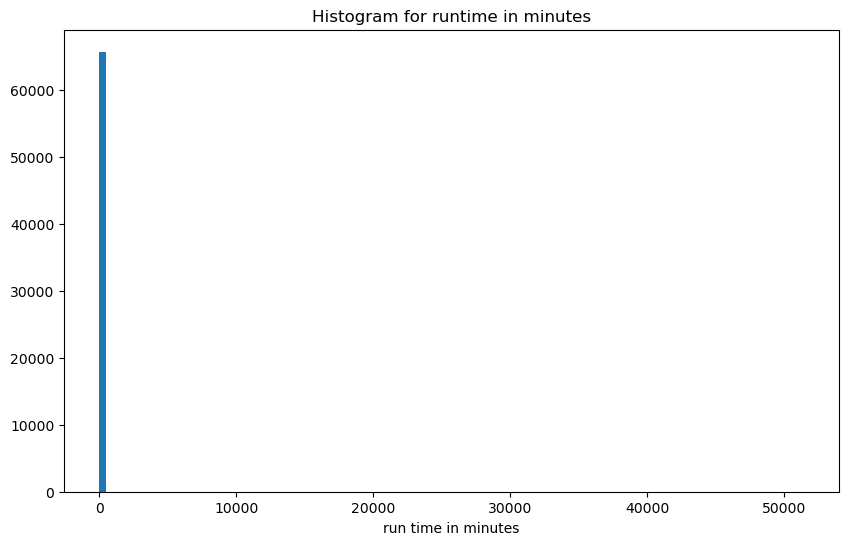

In [11]:
# Plot a histogram to see if the data is positive or negatively skewed
fig, ax = plt.subplots(figsize=(10,6))

# Creating the histogram
x = df['runtime_minutes']
ax.hist(x, bins=100)
ax.set_title("Histogram for runtime in minutes")
ax.set_xlabel("run time in minutes")
plt.show()

As seen by the histogram the data is positively skewed and has a maximum time of 51420 minutes and mininum time of 3 minutes. Because the data is positively skewed it is optimale to median in this because of the large outlier of the maximum time which will greatly affect the mean of the data

In [12]:
# Choose median to fill to missing values because of the outliers in data would greatly affect the mean 
df['runtime_minutes'].fillna(df['runtime_minutes'].median(), inplace=True)

In [13]:
# Checking of all the changes have been made
df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

### Checking for duplicates

In [14]:
duplicates = df.duplicated()

# Checking if there are any duplicates
if duplicates.any():
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


## Exploratory Data Analysis

### Breaking down the Genres Column

In [15]:
# Split the genres into individual columns
df['Genres'] = df['genres'].str.split(',')
# By applying the explode() method to the 'Genres' column, each element within the lists is expanded, resulting in individual rows for each value.
df = df.explode('Genres')

In [16]:
# Checking the changes done to the dataframe
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Drama


In [17]:
# Check the Genres in the dataframe using a frequency table
df['Genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: Genres, dtype: int64

## Dropping genres with a low count in the frequency table

In [18]:
irrelevant_fields = [
    "Short", "Game-Show", "Adult", "Reality-TV", "Western", "News", "Musical", "War"
]
df = df.drop(df[df['Genres'].isin(irrelevant_fields)].index)
df['Genres'].value_counts()

Drama          29858
Comedy         16986
Documentary    16865
Thriller        8129
Horror          7617
Action          6802
Romance         6421
Crime           4563
Adventure       3741
Biography       3704
Family          3307
Mystery         3014
History         2457
Sci-Fi          2175
Fantasy         2078
Music           1902
Animation       1717
Sport           1173
Name: Genres, dtype: int64

To exclude genres with low frequency from the DataFrame, which may not provide an accurate representation of their ratings for example:

Removing genres with low frequency is essential for obtaining reliable ratings. For instance, genres like 'Short' with a count of 1 may produce misleading insights, whereas genres like 'Drama' with a count of 29858 offer a more meaningful representation. By eliminating low frequency genres, we can ensure that the remaining data provides a more accurate expression of ratings.

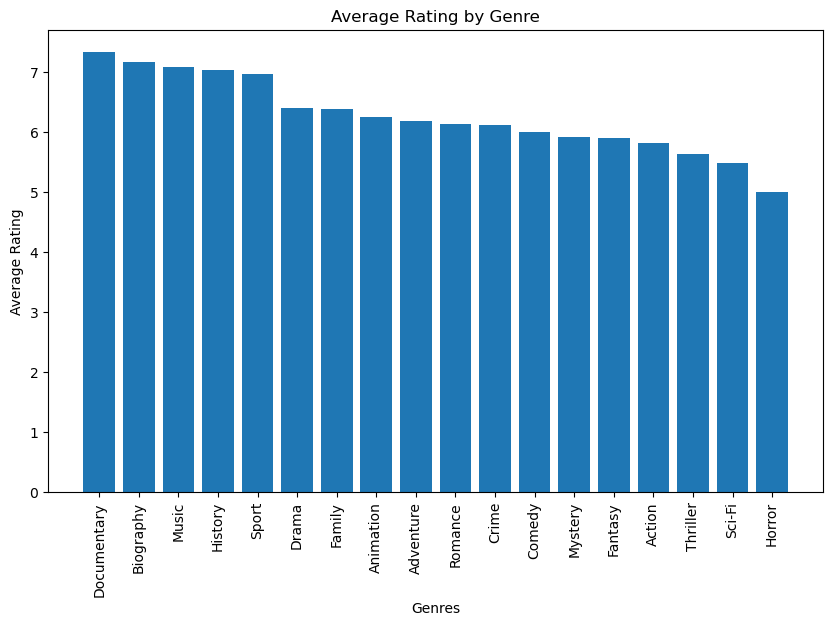

In [19]:
# Group the data by genre and calculate the average rating for each genre
genre_ratings = df.groupby('Genres')['averagerating'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(genre_ratings.index, genre_ratings.values)
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=90)
plt.show()

## Conclusion

- Based on the analysis, it is evident that documentaries, biographies, music-related films, and sports-themed movies have achieved the highest average ratings, reflecting audience appreciation for factual storytelling and engaging content. 
- However, horror and science fiction (sci-fi) films have obtained the lowest average ratings, suggesting a need for improvement in audience reception. These insights provide valuable guidance for the studio to focus on genres with higher potential for positive ratings, while also exploring ways to enhance the quality and appeal of horror and sci-fi films.

## Recommendations
The new Microsoft movie studio should prioritize genres such as documentaries, biographies, music, and sports. These genres have consistently received high ratings and resonated well with audiences. Investing in these genres will increase the likelihood of positive reception and audience satisfaction. It is advisable to focus on these genres rather than horror or sci-fi, which have lower ratings and may face challenges in audience reception. Aligning the studio's content production strategy with successful genres will enhance its chances of success in the movie industry.